# Dragon Real Estate Price Predictor 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.273338,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.694312,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.883000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.198500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.608500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# for plotting histogram
import matplotlib.pyplot as pd
housing.hist(bins = 50, figsize = (20, 15))

## Train-Test Splitting

In [9]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)       # So that every time we run the program the same train_test data used.
#                              #This is done to  make sure that model doesn't see the testing data as whole, if run many times as it will become overfitted
#     shuffled = np.random.permutation(len(data))
# #     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[: test_set_size]
#     train_indices = shuffled[test_set_size: ]
#     return data.iloc[train_indices], data.iloc[test_indices] 

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [13]:
print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}")

Rows in train set: 404 
 Rows in test set: 102


In [14]:
# in case all the CHAS values which are 1 goes into test only or vice versa then how the model will know that CHAS may have 1 value as well (if all 1 goes to test data)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [16]:
strat_train_set.shape

(404, 14)

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [19]:
housing = strat_train_set.copy()

In [20]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.270837,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709450,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.627000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## Looking for Correlations


In [21]:
corr_matrix = housing.corr()    #we will find correlation in training set only

In [22]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.672308
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

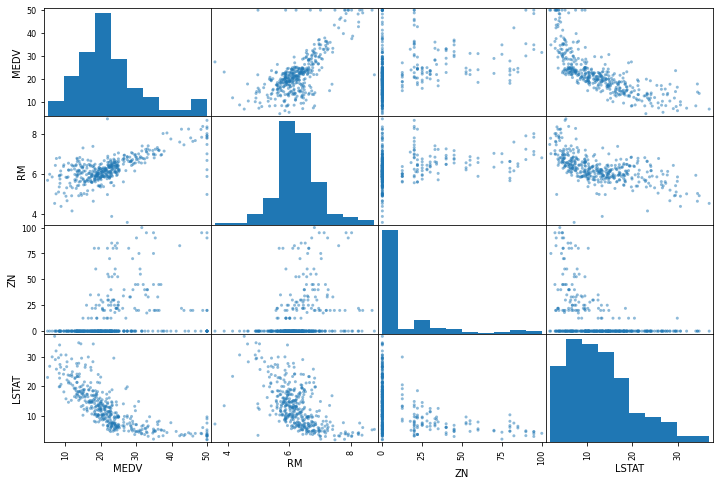

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

## Trying out Attribute combinations

In [24]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.672308
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524059
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

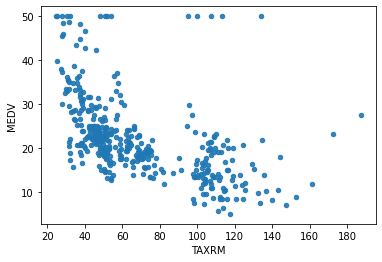

In [27]:
housing.plot(kind = 'scatter', x = "TAXRM", y= "MEDV", alpha= 0.9)

In [28]:
strat_train_set.shape

(404, 14)

In [29]:
housing = strat_train_set.drop("MEDV", axis=1)    #strat_train_set is the data in which we didn't add TAXRM attribute, note it!
housing_labels = strat_train_set["MEDV"].copy()

In [30]:
housing.shape
# housing_labels.shape

(404, 13)

## Handling Missing attributes

In [31]:
# We handle missing attributes in training only
#To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attributes
#     3. Set the value to some value(0, mean or median)

In [32]:
a = housing.dropna(subset = ["RM"])  #option1
a.shape
#Note that there original dataframe will remain unchanged

(399, 13)

In [33]:
housing.drop("RM", axis=1).shape
#droped the RM column, there is no RM column now
#Note that there original dataframe will remain unchanged

(404, 12)

In [34]:
median = housing["RM"].median()

In [35]:
housing["RM"].fillna(median) # option3
#Note that there original dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     6.209
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.shape

(404, 13)

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [39]:
X = imputer.transform(housing)

In [40]:
housing_tr = pd.DataFrame(X, columns= housing.columns)  #tr=Transformed dataset of housing which has no missing values

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.270072,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.705068,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.620500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

In [42]:
# Primarily, three types of objects 
# 1. Estimators - 

# 2. Transformers -

# 3. Predictors - 
# #checkout github code in reply of codewithHarry link


##  Feature Scaling 

In [43]:
# See the notebook by a gut in comments of codewithharry link

##  Creating Pipeline

In [44]:
#Actually except the checking for the head of data and little bit all the tasks that we have done from 
#imputing and correlation and all has to be inside the pipeline itself

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy ='median')),
    #we can add as many as we want in our pipeline
    ('std_scaler', StandardScaler())
])

In [46]:
housing_num_tr = my_pipeline.fit_transform(housing)   #use housing data itself we are using imputer in pipeline, otherwise we could have used housing_tr
#it is a numpy array since all the models (predictors)of Ml will be using numpy array to do predictions and scoring

In [47]:
housing_num_tr.shape    #train data only

(404, 13)

## Selecting a desired model for Dragon real Estates

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = KNeighborsRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [81]:
some_data = housing.iloc[:5]     #just checking for some data for our prediction by model
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [82]:
some_labels = housing_labels.iloc[:5]   #just checking for some data for our prediction by model
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [83]:
prepared_data = my_pipeline.transform(some_data)  #pass our data through pipeline


In [84]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23015184, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.51822037, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.30379114,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.15042454, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.05954063, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [85]:
model.predict(prepared_data)

array([22.323, 25.373, 16.617, 23.177, 23.618])

In [86]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model prediction

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions =  model.predict(housing_num_tr)
#lin_mse = mean_squared_error(housing_labels, housing_predictions)
#lin_rmse = np.sqrt(mse)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [88]:
#lin_mse     # Not giving very good value we will then work with decision treee
rmse        # bhaisaab isne kardi hai overfitting data ki kuch jyada hi acche se train data ko samajh liya hai pura 
# noise wagira bhe samjh liya hai

1.2145917427206336

## Using better evaluation technique - Cross Validation

In [89]:
# k-fold cross validation means will be using k-1 fold at a time train data and 1 fold for cross validation (it will be
#done on training data itself not actual testing data)

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)   #since we took -ve mean_squared_error

In [91]:
rmse_scores

array([2.83767859, 2.93596898, 4.7006334 , 2.57493567, 3.18793767,
       3.18459952, 4.53590884, 3.63723109, 2.78604566, 3.96620687])

In [92]:
def print_scores(scores):
    print('Score:', scores )
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [93]:
print_scores(rmse_scores)

Score: [2.83767859 2.93596898 4.7006334  2.57493567 3.18793767 3.18459952
 4.53590884 3.63723109 2.78604566 3.96620687]
Mean: 3.4347146279214895
Standard deviation: 0.7090361720094064


## Saving the model

In [79]:
# from joblib import dump, load
# dump(model, 'Dragon_Real_Estates.joblib') 

## Testing the model on the test data

In [64]:
# X_test = strat_test_set.drop("MEDV", axis=1)
# Y_test = strat_test_set["MEDV"].copy()
# X_test_prepared = my_pipeline.transform(X_test)
# final_predictions = model.predict(X_test_prepared)
# final_mse =mean_squared_error(Y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)

In [ ]:
# final_rmse

In [ ]:
# print(final_predictions, list(Y_test))

In [ ]:
# prepared_data[0]

## Using of Model